1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Gm 1 : f( [ 0.08984184 -0.71265628] ) =  -1.0316284534896594
Gm 2 : f( [-0.08984185  0.71265627] ) =  -1.0316284534896498
Gm 3 : f( [0. 0.] ) =  0.0


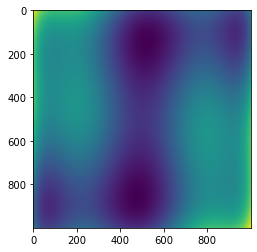

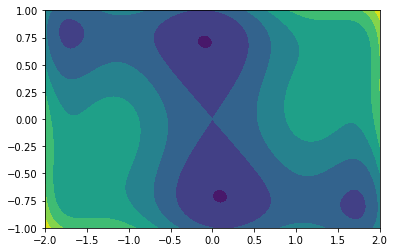

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

def f(x):
    return (4 - 2.1*x[0]**2 + (x[0]**4)/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4)*x[1]**2

x = np.linspace(-2,2,1000)
y= np.linspace(-1,1,1000)

xx, yy = np.meshgrid(x, y)
z = f([xx,yy])
plt.imshow(z)

plt.figure()
plt.contourf(x, y, z)
min3 = optimize.minimize(f, [0, 0])
min1 = optimize.minimize(f , [-2, -1])
min2 = optimize.minimize(f, [+2, +1])
print("Gm 1 : f(",min1.x,") = ",min1.fun)
print("Gm 2 : f(",min2.x,") = ",min2.fun)
min3 = optimize.minimize(f, [0, 0])
print("Gm 3 : f(",min3.x,") = ",min3.fun)


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 2.67499871e+01 -8.27094992e+10  1.56135373e+14]
[-3.96666647e+01 -3.45715292e+11 -9.37002185e+15]


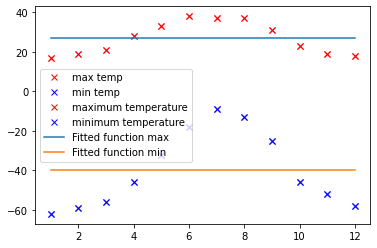

In [30]:
mint = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
maxt = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]

months = np.linspace(1, 12, 12)
plt.plot(months, maxt,'rx', label= "max temp")
plt.plot(months, mint,'bx', label= "min temp")
plt.legend()

def Gauss(x,a, m, std):
    return a*np.exp(-(x-m)**2/(2*std**2))

mean = sum(months*maxt)/12    
sigma = sum(maxt*(months-mean)**2)/12 
params_max, params_covariance_max = optimize.curve_fit(Gauss, months, maxTemp, p0=[1,mean, sigma])
print(params_max)
mean = sum(months*mint)/12    
sigma = sum(mint*(months-mean)**2)/12 

params_min, params_covariance_min = optimize.curve_fit(Gauss, months, mint, p0=[1,mean, sigma])
print(params_min)
plt.plot(months, maxt,'rx', label='maximum temperature')
plt.plot(months, mint,'bx', label='minimum temperature')

# display the function founded
plt.plot(months, Gauss(months, params_max[0], params_max[1],params_max[2]),label='Fitted function max')
plt.plot(months, Gauss(months, params_min[0], params_min[1],params_min[2]),label='Fitted function min')


plt.legend(loc='best')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Best parameters for the fitting of the histogram:
 [-1.02973415e-01 -1.80884145e-01  4.47242716e+02  6.73758676e+01]


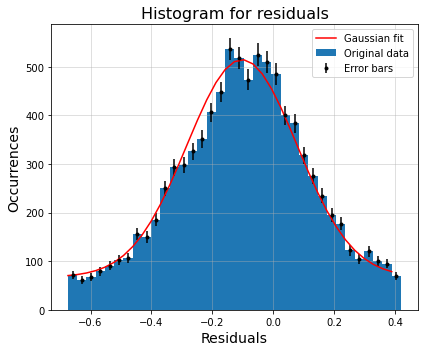

n degrees of freedom = 36

chi2 =  49.50266562297808

p-value = 0.06635584668103112

The p-values is grater than 0.05 hence the fit is satisfactory.


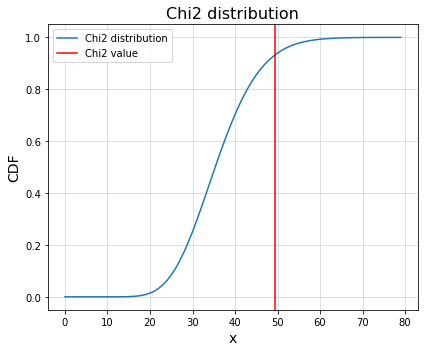

In [38]:
import pickle
import pandas as pd
from scipy.special import factorial
import scipy.stats
from scipy.optimize import minimize,curve_fit

filename = "residuals_261.pkl"
data = pd.read_pickle(filename)
my_dict = dict(data.item())


res = np.asarray(my_dict['residuals'])
occurrences, bin_edges = np.histogram(res, bins=5670)
filtered = np.where(occurrences>=61)
bin_edges = bin_edges[filtered]


def f(x, mean, std, scale,offset):
    return offset+scale*np.exp(-0.5*((x-mean)/std)**2)
fig1 = plt.subplots(tight_layout=True, figsize = (6,5))
h = plt.hist(res, bins=bin_edges)

entries = h[0]
bins = h[1]
bincenters = 0.5*(bins[1:]+bins[:-1])
bins = bins[0:len(h[1])-1]
popt, _ = curve_fit(f, bins, entries, p0=[0, 2, 100, 30])
print('Best parameters for the fitting of the histogram:\n', popt)
fit = f(bins, popt[0], popt[1], popt[2], popt[3])


plt.plot(bins, fit, 'r')
sigma = np.sqrt(np.abs(entries))


plt.errorbar(bincenters, entries, sigma, fmt='.k')
plt.title('Histogram for residuals', size=16)
plt.xlabel('Residuals', size=14)
plt.ylabel('Occurrences', size=14)
plt.legend(['Gaussian fit', 'Original data', 'Error bars'])
plt.grid(alpha=0.5)
plt.show()


ndof = len(bins)
print("n degrees of freedom =", ndof)
chi2 = np.sum(((entries-fit)**2)/sigma**2)
print("\nchi2 = ", chi2)
pvalue = 1 - scipy.stats.chi2.cdf(chi2, ndof)
print('\np-value =', pvalue)
print('\nThe p-values is grater than 0.05 hence the fit is satisfactory.')

p = np.arange(0, 80, 1)
fig2 = plt.subplots(tight_layout=True, figsize = (6,5))
plt.plot(p, scipy.stats.chi2.cdf(p, df=ndof))
plt.fill_between(bins, entries, where=(bins > chi2), color='lightblue')
plt.axvline(chi2, color='r')
plt.title('Chi2 distribution', size=16)
plt.xlabel('x', size=14)
plt.ylabel('CDF', size=14)
plt.legend(['Chi2 distribution', 'Chi2 value'])
plt.grid(alpha=0.5)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

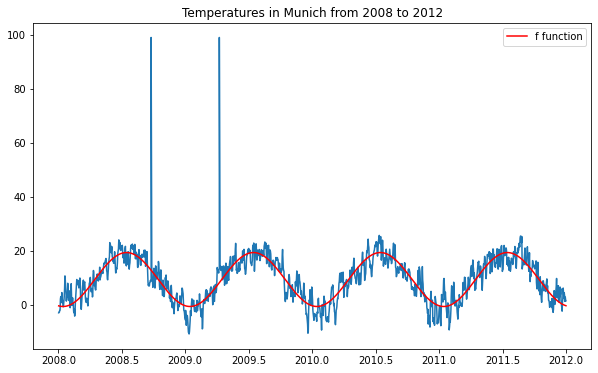

Parameters
a =  -9.988133689134516
b =  12.333023014196588
c =  9.38411486809072
Average temperature :  9.38409773497604
Coldest value :  19.372195568442635
Hottest value :  -0.6037388871173217
The b value corresponds to the phase. So it's needed to shift the sinusoidal function over the time


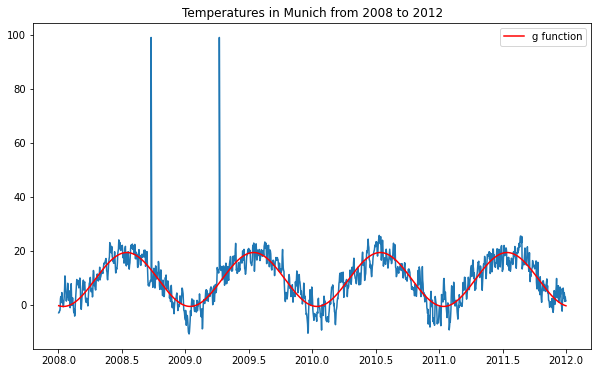

In [35]:
import pandas as pd
import math
def f(t, a, b ,c):
    return a*np.cos(2*math.pi*t + b) + c
def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d


data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", names=['date', 'temp'])
data = data[(data['date'] >= 2008) & (data['date'] <= 2012)]
data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['date'],data['temp'])
ax.set_title("Temperatures in Munich from 2008 to 2012")
par_1,_ = optimize.curve_fit(f, data['date'], data['temp'])
f_fit = f(data['date'], *par_1)
ax.plot(data['date'],f_fit,'r-', label="f function")
ax.legend()
plt.show()

print('Parameters')
print('a = ', par_1[0])
print('b = ', par_1[1])
print('c = ', par_1[2])
print("Average temperature : ", data['temp'].mean())
print("Coldest value : ", max(f_fit))
print("Hottest value : ", min(f_fit))
print("The b value corresponds to the phase. So it's needed to shift the sinusoidal function over the time")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['date'],data['temp'])
ax.set_title("Temperatures in Munich from 2008 to 2012")
par_2,_ = optimize.curve_fit(g, data['date'], data['temp'])

g_fit = g(data['date'], *par_2)
ax.plot(data['date'], g_fit,'r-', label="g function")
ax.legend()
plt.show()